First few rows of the dataset:


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB

Summary Statistics:


,Unnamed: 0
count,18650.000000
mean,9325.154477
std,5384.327293
min,0.000000
25%,4662.250000
50%,9325.500000
75%,13987.750000
max,18650.000000



Missing Values:
Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

Number of phishing and non-phishing emails:
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


C:\Users\Hartl\AppData\Local\Temp\ipykernel_16704\87417865.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Email Type', data=df, palette='bright')


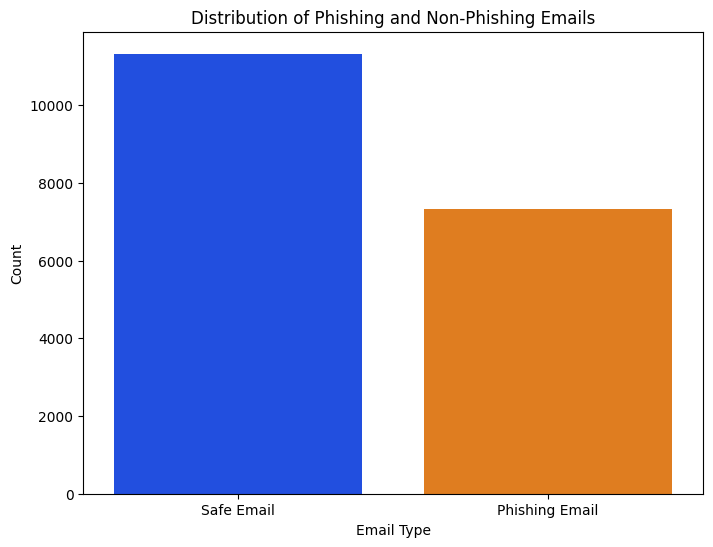


Number of columns in the dataset: 3

Column names:
['Unnamed: 0', 'Email Text', 'Email Type']


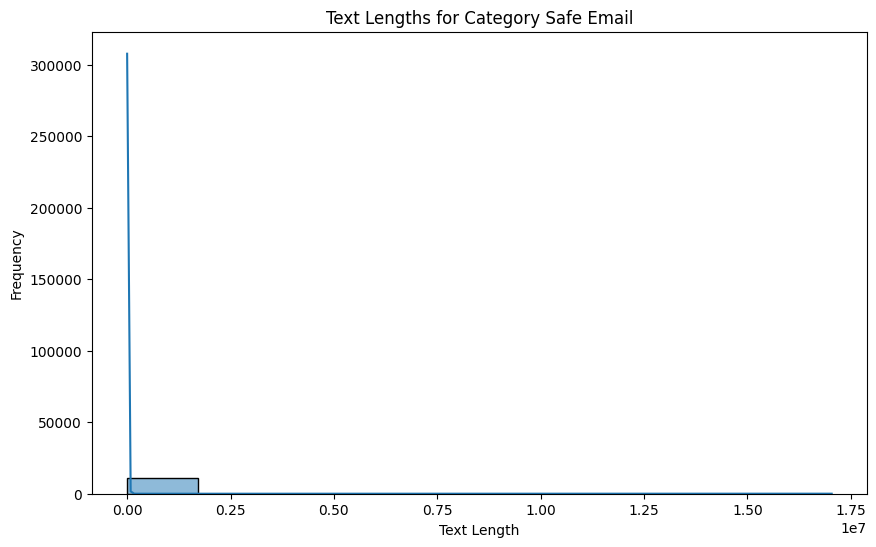

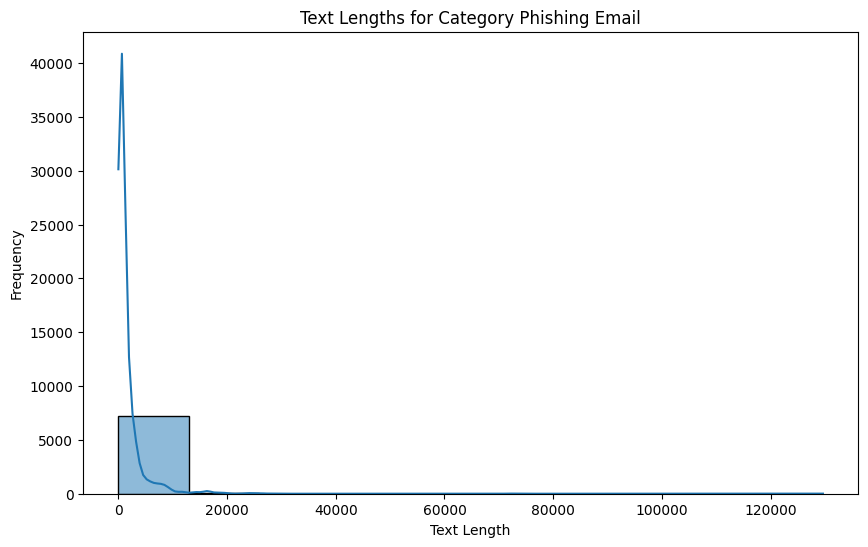

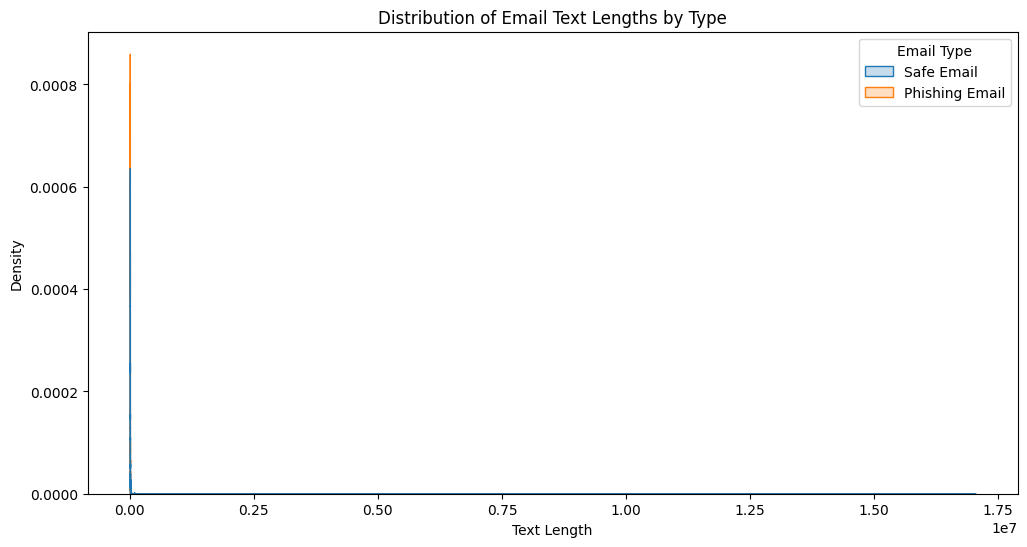

Email Type
Phishing Email    1610.407205
Safe Email        3493.008391
Name: text_length, dtype: float64
Email Type
Phishing Email    731.0
Safe Email        994.5
Name: text_length, dtype: float64
Email Type
Phishing Email    1
Safe Email        5
Name: text_length, dtype: int64
Email Type
Phishing Email      129635
Safe Email        17036692
Name: text_length, dtype: int64


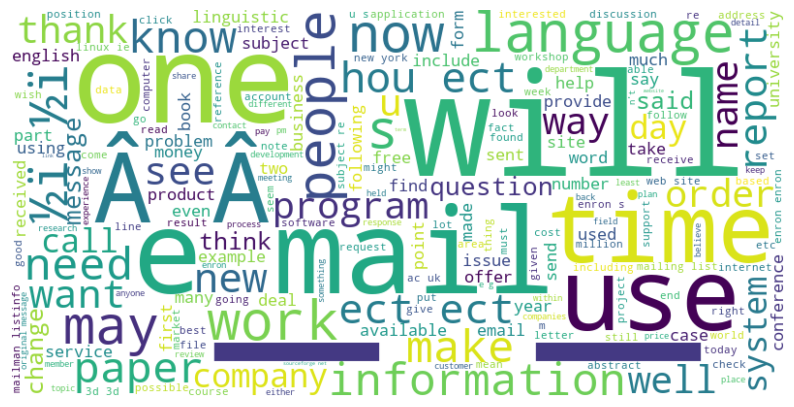

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('../data/raw/phishing_emails.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
display(df.head())

# Display basic information about the dataframe
print("\nDataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Count the number of phishing and non-phishing emails
phishing_counts = df['Email Type'].value_counts()
print("\nNumber of phishing and non-phishing emails:")
print(phishing_counts)

# Visualize the distribution of phishing and non-phishing emails
plt.figure(figsize=(8, 6))
sns.countplot(x='Email Type', data=df, palette='bright')
plt.title('Distribution of Phishing and Non-Phishing Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

# Display the number of columns
num_columns = len(df.columns)
print(f"\nNumber of columns in the dataset: {num_columns}")

# Display the column names
print("\nColumn names:")
print(df.columns.tolist())

df['Email Text'] = df['Email Text'].astype(str).fillna('')
# Calculate text lengths
df['text_length'] = df['Email Text'].apply(len)

# Extract unique categories
categories = df['Email Type'].unique()

# Create a plot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    subset = df[df['Email Type'] == category]
    sns.histplot(subset['text_length'], kde=True, bins=10)
    plt.title(f'Text Lengths for Category {category}')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='Email Type', element='step', stat='density', common_norm=False)
plt.title('Distribution of Email Text Lengths by Type')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

average_lengths = df.groupby('Email Type')['text_length'].mean()
median_length = df.groupby('Email Type')['text_length'].median()
min_length = df.groupby('Email Type')['text_length'].min()
max_length = df.groupby('Email Type')['text_length'].max()
print(average_lengths)
print(median_length)
print(min_length)
print(max_length)

# Combine all the text data into a single string
text = " ".join(df['Email Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()